In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)
df

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.00,0.015,0.00,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.00,0.099,0.00,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.00,0.191,0.00,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.00,0.282,0.00,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.00,0.388,0.00,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,0.03,726.480,0.05,0.579,0.633,0.219,8.035,0.504,NaN,NaN,3.631,NaN,0.036,0.582,NaN,NaN,0.263,NaN,9.35,0.04,0.05,NaN,NaN,0.03,NaN,17.478,577.422,NaN,NaN,131.580,NaN,0.05,0.08,NaN,NaN,0.02,NaN,67.49,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,0.03,737.295,0.05,0.516,0.581,0.228,7.061,0.581,NaN,NaN,3.173,NaN,0.041,0.503,NaN,NaN,0.226,NaN,12.54,0.04,0.05,NaN,NaN,0.03,NaN,18.059,584.482,NaN,NaN,134.753,NaN,0.05,0.08,NaN,NaN,0.02,NaN,65.98,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,0.03,747.542,0.05,0.467,0.536,NaN,6.383,0.581,NaN,NaN,3.283,NaN,0.041,0.448,NaN,NaN,0.231,NaN,14.90,0.04,0.04,NaN,NaN,0.03,NaN,18.640,590.865,NaN,NaN,138.036,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,0.03,758.882,0.05,0.499,0.564,NaN,7.369,0.581,NaN,NaN,3.390,NaN,0.040,0.510,NaN,NaN,0.235,NaN,13.01,0.04,0.05,NaN,NaN,0.03,NaN,19.222,598.234,NaN,NaN,141.426,NaN,0.05,0.08,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,

Add methane growth percentage to the table.  
The change is calculated over 1 year as well as 5 years

In [2]:
def get_info(df, i):
  row = df.iloc[i]
  country = row.country
  year = row.year
  methane = row.methane
  return(country, year, methane)

def methane_in(df, country, year, index):
  probable_row = df.iloc[[max(0, index)]]
  row = probable_row[(probable_row.country == country) & (probable_row.year == year)]
  if(len(row) == 1):
    return(row.methane.values[0])
  else:
    return(np.nan)


# One year back
df["methane_growth_prct"] = np.nan

for i in range(len(df)):
  country, year, methane = get_info(df, i)
  methane_1_year_ago = methane_in(df, country, year - 1, i - 1)

  # Check if there is valid data and put the result into the data frame
  if(not pd.isna(methane) and not pd.isna(methane_1_year_ago) and methane_1_year_ago != 0.0):
    change_in_a_year = 100 * (methane - methane_1_year_ago) / methane_1_year_ago
    df.at[i, "methane_growth_prct"] = change_in_a_year

  if(i % 1000 == 0):
      print(str(i) + " rows done")


# Five years back
df["methane_growth_prct_5_years"] = np.nan

for i in range(len(df)):
  country, year, methane = get_info(df, i)
  methane_5_years_ago = methane_in(df, country, year - 5, i - 5)

  # Check if there is valid data and put the result into the data frame
  if(not pd.isna(methane) and not pd.isna(methane_5_years_ago) and methane_5_years_ago != 0.0):
    change_in_a_year = 100 * (methane - methane_5_years_ago) / methane_5_years_ago
    df.at[i, "methane_growth_prct_5_years"] = change_in_a_year

  if(i % 1000 == 0):
      print(str(i) + " rows done")



print("All done")

0 rows done
1000 rows done
2000 rows done
3000 rows done
4000 rows done
5000 rows done
6000 rows done
7000 rows done
8000 rows done
9000 rows done
10000 rows done
11000 rows done
12000 rows done
13000 rows done
14000 rows done
15000 rows done
16000 rows done
17000 rows done
18000 rows done
19000 rows done
20000 rows done
21000 rows done
22000 rows done
23000 rows done
24000 rows done
0 rows done
1000 rows done
2000 rows done
3000 rows done
4000 rows done
5000 rows done
6000 rows done
7000 rows done
8000 rows done
9000 rows done
10000 rows done
11000 rows done
12000 rows done
13000 rows done
14000 rows done
15000 rows done
16000 rows done
17000 rows done
18000 rows done
19000 rows done
20000 rows done
21000 rows done
22000 rows done
23000 rows done
24000 rows done
All done


Also add the percentage change over 5 years in CO2 emissions.

In [3]:
def get_info(df, i):
  row = df.iloc[i]
  country = row.country
  year = row.year
  co2 = row.co2
  return(country, year, co2)

def co2_in(df, country, year, index):
  probable_row = df.iloc[[max(0, index)]]
  row = probable_row[(probable_row.country == country) & (probable_row.year == year)]
  if(len(row) == 1):
    return(row.co2.values[0])
  else:
    return(np.nan)

# Five years back
df["co2_growth_prct_5_years"] = np.nan

for i in range(len(df)):
  country, year, co2 = get_info(df, i)
  co2_5_years_ago = co2_in(df, country, year - 5, i - 5)

  # Check if there is valid data and put the result into the data frame
  if(not pd.isna(co2) and not pd.isna(co2_5_years_ago) and co2_5_years_ago != 0.0):
    change_in_a_year = 100 * (co2 - co2_5_years_ago) / co2_5_years_ago
    df.at[i, "co2_growth_prct_5_years"] = change_in_a_year

  if(i % 1000 == 0):
      print(str(i) + " rows done")


print("All done")

df[df.country == "Argentina"][["country", "year", "co2", "co2_growth_prct", "co2_growth_prct_5_years", "methane", "methane_growth_prct", "methane_growth_prct_5_years"]].tail(10)

0 rows done
1000 rows done
2000 rows done
3000 rows done
4000 rows done
5000 rows done
6000 rows done
7000 rows done
8000 rows done
9000 rows done
10000 rows done
11000 rows done
12000 rows done
13000 rows done
14000 rows done
15000 rows done
16000 rows done
17000 rows done
18000 rows done
19000 rows done
20000 rows done
21000 rows done
22000 rows done
23000 rows done
24000 rows done
All done


,country,year,co2,co2_growth_prct,co2_growth_prct_5_years,methane,methane_growth_prct,methane_growth_prct_5_years
747,Argentina,2010,186.733,4.35,15.671420,115.71,-9.798877,-10.558862
748,Argentina,2011,190.274,1.90,8.971473,115.53,-0.155561,-13.037260
749,Argentina,2012,191.715,0.76,10.025481,121.03,4.760668,-8.052875
750,Argentina,2013,190.152,-0.82,1.087685,119.75,-1.057589,-9.847173
751,Argentina,2014,188.697,-0.76,5.447362,118.12,-1.361169,-7.920175
752,Argentina,2015,192.366,1.94,3.016607,117.37,-0.634948,1.434621
753,Argentina,2016,190.930,-0.75,0.344766,121.54,3.552867,5.202112
754,Argentina,2017,187.416,-1.84,-2.242391,NaN,NaN,NaN
755,Argentina,2018,185.030,-1.27,-2.693635,NaN,NaN,NaN
756,Argentina,2019,178.940,-3.29,-5.170723,NaN,NaN,NaN


## Scatter plot of the changes

In [4]:
year = 2016

df_1 = df[["country", "year", "population", "gdp", "co2", "co2_growth_prct", "co2_growth_prct_5_years", "methane", "methane_growth_prct", "methane_growth_prct_5_years"]]
df_1["gdp_per_capita"] = df_1["gdp"] / df_1["population"]
df_1 = df_1[df_1.year == year]

# The non-countries that I have found in the data. Should Antarctica be included?
not_countries = ["Africa", "Antarctica", "Asia (excl. China & India)", "Asia", "EU-27", "EU-28", "Europe", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "International transport",
                 "North America (excl. USA)", "North America", "Oceania", "South America", "World"]

df_1 = df_1[~df_1.country.isin(not_countries)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


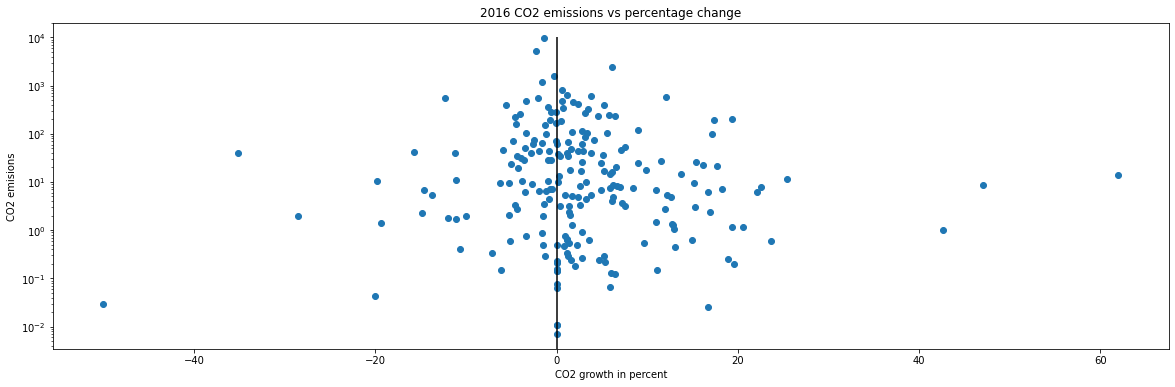

In [5]:
plt.figure(figsize = (20, 6))
points = plt.scatter(x = df_1.co2_growth_prct, y = df_1.co2)
plt.yscale("log")
plt.xlabel("CO2 growth in percent")
plt.ylabel("CO2 emisions")
plt.title(str(year) + " CO2 emissions vs percentage change")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)

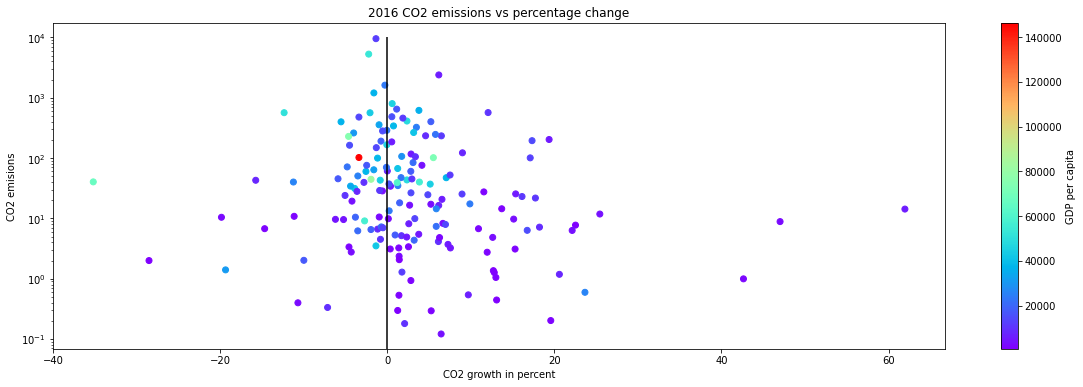

In [6]:
import matplotlib.cm as cm


color_values = df_1.gdp_per_capita

plt.figure(figsize = (20, 6))
points = plt.scatter(x = df_1.co2_growth_prct, y = df_1.co2, c = color_values, cmap="rainbow")
plt.yscale("log")
plt.xlabel("CO2 growth in percent")
plt.ylabel("CO2 emisions")
plt.title(str(year) + " CO2 emissions vs percentage change")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)
plt.colorbar(points).set_label("GDP per capita")

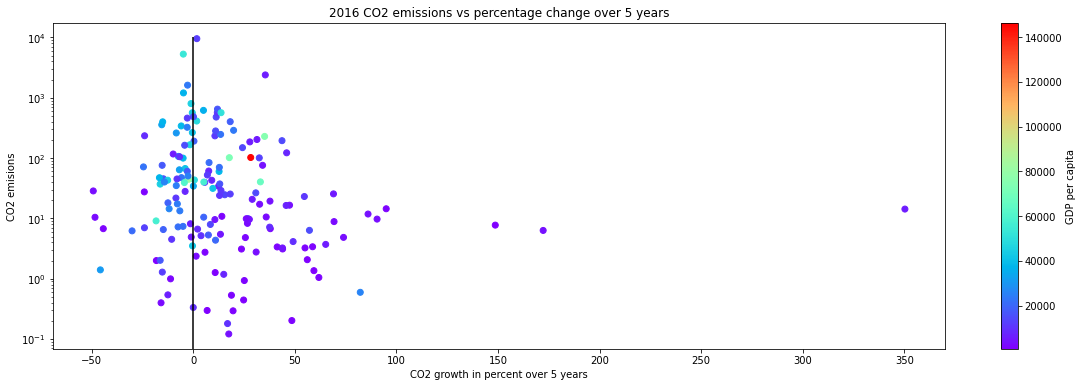

In [7]:
color_values = df_1.gdp_per_capita

plt.figure(figsize = (20, 6))
points = plt.scatter(x = df_1.co2_growth_prct_5_years, y = df_1.co2, c = color_values, cmap="rainbow")
plt.yscale("log")
plt.xlabel("CO2 growth in percent over 5 years")
plt.ylabel("CO2 emisions")
plt.title(str(year) + " CO2 emissions vs percentage change over 5 years")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)
plt.colorbar(points).set_label("GDP per capita")

Same for methane

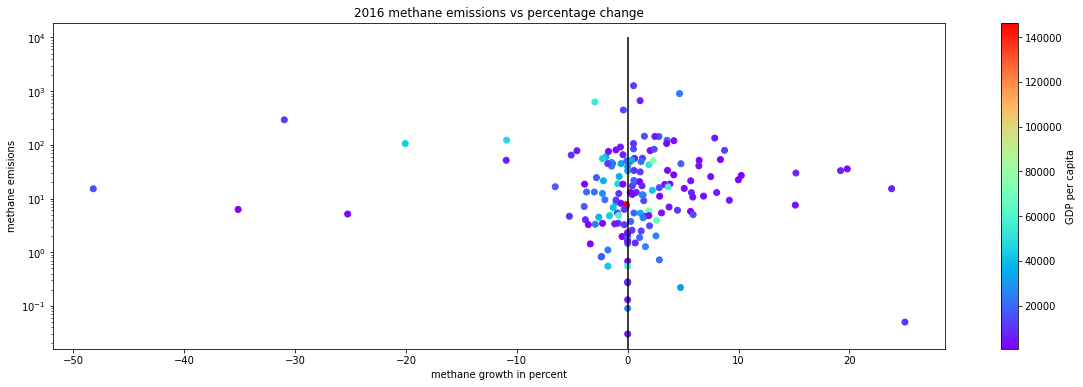

In [8]:
color_values = df_1.gdp_per_capita

plt.figure(figsize = (20, 6))
points = plt.scatter(x = df_1.methane_growth_prct, y = df_1.methane, c = color_values, cmap="rainbow")
plt.yscale("log")
plt.xlabel("methane growth in percent")
plt.ylabel("methane emisions")
plt.title(str(year) + " methane emissions vs percentage change")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)
plt.colorbar(points).set_label("GDP per capita")

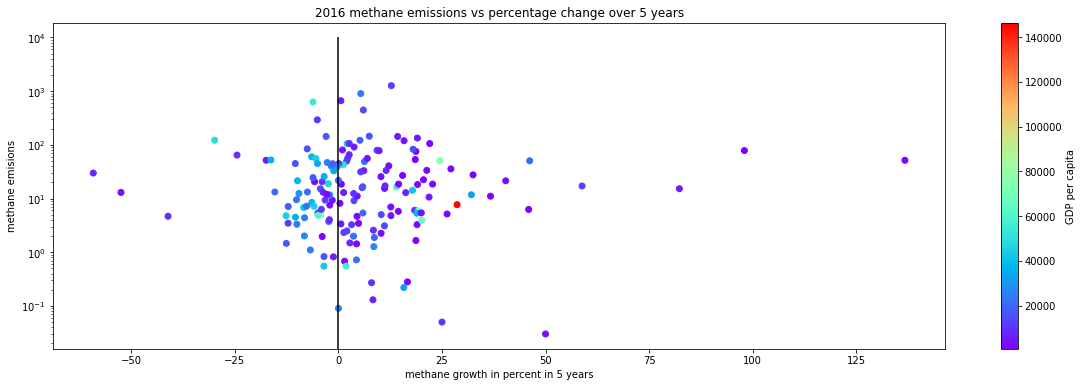

In [9]:
color_values = df_1.gdp_per_capita

plt.figure(figsize = (20, 6))
points = plt.scatter(x = df_1.methane_growth_prct_5_years, y = df_1.methane, c = color_values, cmap="rainbow")
plt.yscale("log")
plt.xlabel("methane growth in percent in 5 years")
plt.ylabel("methane emisions")
plt.title(str(year) + " methane emissions vs percentage change over 5 years")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)
plt.colorbar(points).set_label("GDP per capita")

The interactive plot does not seem to work in a Jupyter notebook, at least not in Google Colab

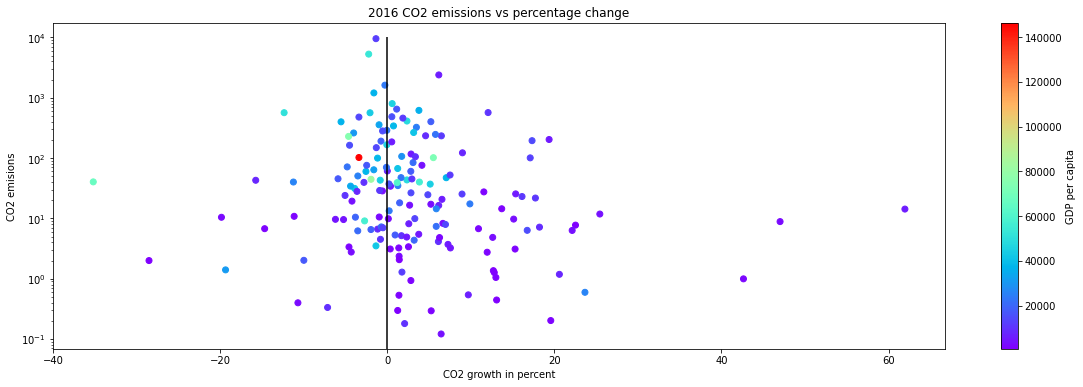

In [10]:
# Ideas for interactive point annotations: https://stackoverflow.com/questions/7908636/how-to-add-hovering-annotations-in-matplotlib

names = df_1.country.unique()
color_values = df_1.gdp_per_capita

fig,ax = plt.subplots(figsize = (20,6))

points = plt.scatter(x = df_1.co2_growth_prct, y = df_1.co2, c = color_values, cmap="rainbow")
plt.yscale("log")
plt.xlabel("CO2 growth in percent")
plt.ylabel("CO2 emisions")
plt.title(str(year) + " CO2 emissions vs percentage change")
#plt.xlim([-20, 20])
plt.vlines(0, 0, 1*10**4)
plt.colorbar(points).set_label("GDP per capita")


annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    pos = points.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(", ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    #annot.get_bbox_patch().set_facecolor("red")
    #annot.get_bbox_patch().set_alpha(0.8)


currently_showing = np.array([])

def hover(event):
    global currently_showing
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = points.contains(event)
        new_to_show = np.array(ind["ind"])
        if not np.array_equal(currently_showing, new_to_show):
            currently_showing = new_to_show
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()



At each year, how many countries increased and how many decreased their GHG emissions?

,positive_co2_growth,negative_co2_growth,unknown_growth,all_countries,positive_co2_growth_percentage
year,,,,,
2006,135.0,69.0,19.0,223,66.176471
2007,143.0,62.0,18.0,223,69.756098
2008,124.0,79.0,21.0,224,61.083744
2009,98.0,108.0,18.0,224,47.572816
2010,149.0,57.0,18.0,224,72.330097
2011,127.0,82.0,15.0,224,60.765550
2012,117.0,88.0,19.0,224,57.073171
2013,118.0,87.0,19.0,224,57.560976
2014,129.0,76.0,19.0,224,62.926829


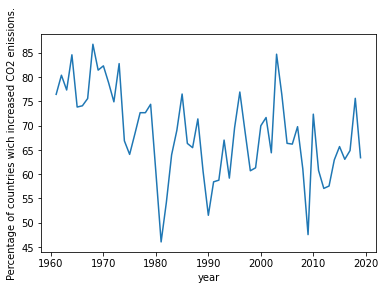

In [14]:
df_2 = df[~df.country.isin(not_countries)]

positive_growth = df_2[["year", "co2_growth_prct"]].groupby(by = ["year"]).agg(lambda x: (x > 0).sum())
negative_growth = df_2[["year", "co2_growth_prct"]].groupby(by = ["year"]).agg(lambda x: (x < 0).sum())
na_growth       = df_2[["year", "co2_growth_prct"]].groupby(by = ["year"]).agg(lambda x: np.logical_or(pd.isna(x), x == 0).sum())
countries_num   = df_2[["country", "year"]].groupby(["year"]).count()

negative_growth
na_growth

#positive_growth.join(negative_growth)
positive_growth.columns = ["positive_co2_growth"]
negative_growth.columns = ["negative_co2_growth"]
na_growth.columns = ["unknown_growth"]
countries_num.columns = ["all_countries"]

growth_summary = positive_growth.join(negative_growth).join(na_growth).join(countries_num)

growth_summary = growth_summary[growth_summary.index > 1960]

growth_summary.name = "Number of countries with positive CO2 growth"


growth_summary["positive_co2_growth_percentage"] = 100 * growth_summary.positive_co2_growth / (growth_summary.positive_co2_growth + growth_summary.negative_co2_growth)

growth_summary.positive_co2_growth_percentage.plot(ylabel = "Percentage of countries wich increased CO2 enissions.")

growth_summary.tail(14)

In [12]:
df[df.country == "Kosovo"]

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,methane_growth_prct,methane_growth_prct_5_years,co2_growth_prct_5_years
12175,OWID_KOS,Kosovo,2008,7.387,NaN,NaN,NaN,NaN,NaN,NaN,0.02,7.387,0.00,NaN,NaN,0.306,5.514,0.231,NaN,NaN,1.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,0.01,NaN,0.231,5.514,NaN,NaN,1.641,NaN,0.00,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.133,NaN,NaN,NaN,NaN,NaN
12176,OWID_KOS,Kosovo,2009,8.130,NaN,10.07,0.744,NaN,NaN,NaN,0.03,15.517,0.00,NaN,NaN,0.300,6.262,0.194,NaN,NaN,1.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,NaN,NaN,0.02,NaN,0.425,11.776,NaN,NaN,3.316,NaN,0.00,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.121,NaN,NaN,NaN,NaN,NaN
12177,OWID_KOS,Kosovo,2010,8.372,NaN,2.97,0.242,NaN,NaN,NaN,0.03,23.889,0.00,NaN,NaN,0.302,6.614,0.161,NaN,NaN,1.598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.05,NaN,NaN,0.01,NaN,0.586,18.390,NaN,NaN,4.913,NaN,0.00,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.731,NaN,NaN,NaN,NaN,NaN
12178,OWID_KOS,Kosovo,2011,8.310,NaN,-0.74,-0.062,NaN,NaN,NaN,0.02,32.199,0.00,NaN,NaN,0.296,6.408,0.161,NaN,NaN,1.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.04,NaN,NaN,0.02,NaN,0.747,24.798,NaN,NaN,6.654,NaN,0.00,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.054,NaN,NaN,NaN,NaN,NaN
12179,OWID_KOS,Kosovo,2012,7.874,NaN,-5.25,-0.436,NaN,NaN,NaN,0.02,40.073,0.00,NaN,NaN,0.302,6.046,0.205,NaN,NaN,1.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.04,NaN,NaN,0.01,NaN,0.953,30.844,NaN,NaN,8.276,NaN,0.00,0.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.074,NaN,NaN,NaN,NaN,NaN
12180,OWID_KOS,Kosovo,2013,8.006,NaN,1.68,0.132,NaN,NaN,NaN,0.02,48.079,0.00,NaN,NaN,0.297,6.145,0.216,NaN,NaN,1.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,0.01,NaN,1.169,36.989,NaN,NaN,9.921,NaN,0.00,0.01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.917,NaN,NaN,NaN,NaN,8.379586
12181,OWID_KOS,Kosovo,2014,7.126,NaN,-10.98,-0.879,NaN,NaN,NaN,0.02,55.205,0.00,NaN,NaN,0.296,5.353,0.187,NaN,NaN,1.587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.04,NaN,NaN,0.01,NaN,1.356,42.342,NaN,NaN,11.508,NaN,0.00,0.01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.045,NaN,NaN,NaN,NaN,-12.349323
12182,OWID_KOS,Kosovo,2015,8.339,NaN,17.02,1.213,NaN,NaN,NaN,0.02,63.545,0.00,NaN,NaN,0.298,6.155,0.231,NaN,NaN,1.954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,0.02,NaN,1.587,48.497,NaN,NaN,13.462,NaN,0.00,0.01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.981,NaN,NaN,NaN,NaN,-0.394171
12183,OWID_KOS,Kosovo,2016,8.860,NaN,6.24,0.520,NaN,NaN,NaN,0.03,72.404,0.00,NaN,NaN,0.297,6.668,0.278,NaN,NaN,1.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,NaN,NaN,0.02,NaN,1.865,55.165,NaN,NaN,15.374,NaN,0.01,0.01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.868,NaN,NaN,NaN,NaN,6.618532
12184,OWID_KOS,Kosovo,2017,8.094,NaN,-8.64,-0.766,NaN,NaN,NaN,0.02,80.498,0.01,NaN,NaN,NaN,5.602,0.326,NaN,NaN,2.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,0.02,NaN,2.191,60.767,NaN,

In [13]:
[x/10 for x in range(11)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]